# 1. Les expressions régulières : à quoi ça sert ?

Chercher un mot dans un texte est une tâche facile, c'est l'objectif de la méthode find attachée aux chaînes de caractères, elle suffit encore lorsqu'on cherche un mot au pluriel ou au singulier mais il faut l'appeler au moins deux fois pour chercher ces deux formes. Pour des expressions plus compliquées, il est conseillé d'utiliser les expressions régulières. C'est une fonctionnalité qu'on retrouve dans beaucoup de langages. C'est une forme de grammaire qui permet de rechercher des expressions.


Lorsqu'on remplit un formulaire, on voit souvent le format ``"MM/JJ/AAAA"`` qui précise sous quelle forme on s'attend à ce qu’une date soit écrite. Les expressions régulières permettent de définir également ce format et de chercher dans un texte toutes les chaînes de caractères qui sont conformes à ce format.

La liste qui suit contient des dates de naissance. On cherche à obtenir toutes les dates de cet exemple sachant que les jours ou les mois contiennent un ou deux chiffres, les années deux ou quatre.

In [1]:
s = """date 0 : 14/9/2000
date 1 : 20/04/1971     date 2 : 14/09/1913     date 3 : 2/3/1978
date 4 : 1/7/1986     date 5 : 7/3/47     date 6 : 15/10/1914
date 7 : 08/03/1941     date 8 : 8/1/1980     date 9 : 30/6/1976"""

Le premier chiffre du jour est soit 0, 1, 2, ou 3 ; ceci se traduit par ``[0-3]``. Le second chiffre est compris entre 0 et 9, soit ``[0-9]``. Le format des jours est traduit par ``[0-3][0-9]``. Mais le premier jour est facultatif, ce qu'on précise avec le symbole ? : ``[0-3]?[0-9]``. Les mois suivent le même principe : ``[0-1]?[0-9]``. Pour les années, ce sont les deux premiers chiffres qui sont facultatifs, le symbole ? s'appliquent sur les deux premiers chiffres, ce qu'on précise avec des parenthèses : ``([0-2][0-9])?[0-9][0-9]``. Le format final d'une date devient :

In [2]:
"[0-3]?[0-9]/[0-1]?[0-9]/([0-2][0-9])?[0-9][0-9]"

'[0-3]?[0-9]/[0-1]?[0-9]/([0-2][0-9])?[0-9][0-9]'

Le module re gère les expressions régulières, celui-ci traite différemment les parties de l'expression régulière qui sont entre parenthèses de celles qui ne le sont pas : c'est un moyen de dire au module re que nous nous intéressons à telle partie de l'expression qui est signalée entre parenthèses. Comme la partie qui nous intéresse - une date - concerne l'intégralité de l'expression régulière, il faut insérer celle-ci entre parenthèses.

La première étape consiste à construire l'expression régulière, la seconde à rechercher toutes les fois qu'un morceau de la chaîne s définie plus haut correspond à l’expression régulière.

In [3]:
import re
# première étape : construction
expression = re.compile("([0-3]?[0-9]/[0-1]?[0-9]/([0-2][0-9])?[0-9][0-9])")

s = "08/04/1981"

# seconde étape : recherche
res = expression.findall(s)
print(res)

[('08/04/1981', '19')]


In [4]:
res

[('08/04/1981', '19')]

In [5]:
expression.findall?

Signature: expression.findall(string, pos=0, endpos=9223372036854775807)
Docstring: Return a list of all non-overlapping matches of pattern in string.
Type:      builtin_function_or_method


Le résultat une liste de couples dont chaque élément correspond aux parties comprises entre parenthèses qu'on appelle des groupes. Lorsque les expressions régulières sont utilisées, on doit d'abord se demander comment définir ce qu’on cherche puis quelles fonctions utiliser pour obtenir les résultats de cette recherche. Les deux paragraphes qui suivent y répondent.

## 1.1 Syntaxe

La syntaxe des expressions régulières est décrite sur le site officiel de python. La page [Regular Expression Syntax](https://docs.python.org/3/library/re.html?highlight=re#regular-expression-syntax) décrit comment se servir des expressions régulières, les deux pages sont en anglais. Comme toute grammaire, celle des expressions régulières est susceptible d’évoluer au fur et à mesure des versions du langage python.

## 1.2 Les ensembles de caractères
Lors d’une recherche, on s’intéresse aux caractères et souvent aux classes de caractères : on cherche un chiffre, une lettre, un caractère dans un ensemble précis ou un caractère qui n’appartient pas à un ensemble précis. Certains ensembles sont prédéfinis, d’autres doivent être définis à l’aide de crochets.

Pour définir un ensemble de caractères, il faut écrire cet ensemble entre crochets : [0123456789] désigne un chiffre. Comme c’est une séquence de caractères consécutifs, on peut résumer cette écriture en [0-9]. Pour inclure les symboles -, +, il suffit d’écrire : [-0-9+]. Il faut penser à mettre le symbole - au début pour éviter qu’il ne désigne une séquence.

Le caractère ^ inséré au début du groupe signifie que le caractère cherché ne doit pas être un de ceux qui suivent. Le tableau suivant décrit les ensembles prédéfinis et leur équivalent en terme d’ensemble de caractères :

* ``.`` désigne tout caractère non spécial quel qu'il soit.
* ``\d`` désigne tout chiffre, est équivalent à ``[0-9]``.
* ``\D`` désigne tout caractère différent d'un chiffre, est équivalent à ``[^0-9]``.
* ``\s`` désigne tout espace ou caractère approché, est équivalent à ``[\; \t\n\r\f\v]``. Ces caractères sont spéciaux, les plus utilisés sont ``\t`` qui est une tabulation, ``\n`` qui est une fin de ligne et qui ``\r`` qui est un retour à la ligne.
* ``\S`` désigne tout caractère différent d'un espace, est équivalent à ``[^ \t\n\r\f\v]``.
* ``\w`` désigne tout lettre ou chiffre, est équivalent à ``[a-zA-Z0-9_]``.
* ``\W`` désigne tout caractère différent d'une lettre ou d'un chiffre, est équivalent à ``[^a-zA-Z0-9_]``.
* ``^`` désigne le début d'un mot sauf s'il est placé entre crochets.
* ``$`` désigne la fin d'un mot sauf s'il est placé entre crochets.

A l'instar des chaînes de caractères, comme le caractère ``\`` est un caractère spécial, il faut le doubler : ``[\\]``.

Le caractère ``\`` est déjà un caractère spécial pour les chaînes de caractères en python, il faut donc le quadrupler pour l'insérer dans un expression régulière. L'expression suivante filtre toutes les images dont l’extension est png et qui sont enregistrées dans un répertoire image.

In [6]:
import re
s = "something\\support\\vba\\image/vbatd1_4.png"
print(re.compile("[\\\\/]image[\\\\/].*[.]png").search(s))  # résultat positif
print(re.compile("[\\\\/]image[\\\\/].*[.]png").search(s))  # même résultat

<re.Match object; span=(21, 40), match='\\image/vbatd1_4.png'>
<re.Match object; span=(21, 40), match='\\image/vbatd1_4.png'>


## 1.3 Les multiplicateurs
Les multiplicateurs permettent de définir des expressions régulières comme : un mot entre six et huit lettres qu’on écrira ``[\w]{6,8}``. Le tableau suivant donne la liste des multiplicateurs principaux :

* ``*`` présence de l'ensemble de caractères qui précède entre 0 fois et l'infini
* ``+`` présence de l'ensemble de caractères qui précède entre 1 fois et l'infini
* ``?`` présence de l'ensemble de caractères qui précède entre 0 et 1 fois
* ``{m,n}`` présence de l'ensemble de caractères qui précède entre *m* et *n* fois, si *m=n*, cette expression peut être résumée par ``{n}``.
* ``(?!(...))`` absence du groupe désigné par les points de suspensions.

L’algorithme des expressions régulières essaye toujours de faire correspondre le plus grand morceau à l’expression régulière. 

In [7]:
"<h1>mot</h1>"

'<h1>mot</h1>'

``<.*>`` correspond avec ``<h1>``, ``</h1>`` ou encore ``<h1>mot</h1>``.

Par conséquent, l’expression régulière correspond à trois morceaux. Par défaut, il prendra le plus grand. Pour choisir les plus petits, il faudra écrire les multiplicateurs comme ceci : ``*?``, ``+?``

In [8]:
import re
s = "<h1>mot</h1>"
print(re.compile("(<.*>)").match(s).groups())   # ('<h1>mot</h1>',)
print(re.compile("(<.*?>)").match(s).groups())  # ('<h1>',)
print(re.compile("(<.+?>)").match(s).groups())  # ('<h1>',)

('<h1>mot</h1>',)
('<h1>',)
('<h1>',)


### Exercice 1

Recherchez les dates présentes dans la phrase suivante

In [9]:
texte = """Je suis né le 28/12/1903 et je suis mort le 08/02/1957. Ma seconde femme est morte le 10/11/1963. 
J'ai écrit un livre intitulé 'Comprendre les fractions : les exemples en page 12/46/83' """

In [10]:
# première étape : construction
expression = re.compile("([0-3]?[0-9]/[0-1]?[0-9]/[0-2]?[0-9]?[0-9][0-9])")

# seconde étape : recherche
res = expression.findall(texte)
print(res)

['28/12/1903', '08/02/1957', '10/11/1963']


Puis dans celle-ci : 

In [11]:
texte = """Je suis né le 28/12/1903 et je suis mort le 08/02/1957. Je me suis marié le 8/5/45. 
J'ai écrit un livre intitulé 'Comprendre les fractions : les exemples en page 12/46/83' """

In [12]:
res = expression.findall(texte)
print(res)

['28/12/1903', '08/02/1957', '8/5/45']


# 2. Web Scrapping

Sous ce nom se cache une pratique très utile pour toute personne souhaitant travailler sur des informations disponibles en ligne, mais n'existant pas forcément sous la forme d'un tableau *Excel*... Bref, il s'agit de récupérer des informations depuis *Internet*.

Le [webscraping](https://fr.wikipedia.org/wiki/Web_scraping) désigne les techniques d'extraction du contenu des sites internet. Via un programme informatique : nous allons aujourd'hui vous présenter comme créer et exécuter ces robots afin de recupérer rapidement des informations utiles à vos projets actuels ou futurs.

## 2.1 Un détour par le Web : comment fonctionne un site ?

Même si nous n'allons pas aujourd'hui faire un cours de web, il vous faut néanmoins certaines bases pour comprendre comment un site internet fonctionne et comment sont structurées les informations sur une page.

Un site Web est un ensemble de pages codées en *HTML* qui permet de décrire à la fois le contenu et la forme d'une page *Web*.

###  HTML 

### Les balises


Sur une page web, vous trouverez toujours à coup sûr des éléments comme ``<head>``, ``<title>``, etc. Il  s'agit des codes qui vous permettent de structurer le contenu d'une page *HTML* et qui s'appellent des balises. 
Citons, par exemple, les balises ``<p>``, ``<h1>``, ``<h2>``, ``<h3>``, ``<strong>`` ou ``<em>``.
Le symbole ``< >`` est une balise : il sert à indiquer le début d'une partie. Le symbole ``</ >`` indique la fin de cette partie. La plupart des balises vont par paires, avec une *balise ouvrante* et une *balise fermante* (par exemple ``<p>`` et ``</p>``).

#### Exemple : les balise des tableaux

$$
\begin{array}{rr} \hline
Balise  & \text{Description} \\ \hline
< table> & \text{Tableau} \\
< caption>& \text{Titre du tableau} \\
< tr> & \text{Ligne de tableau} \\
< th> & \text{Cellule d'en-tête}\\
< td> & \text{Cellule} \\
< thead> & \text{Section de l'en-tête du tableau} \\
< tbody> & \text{Section du corps du tableau} \\
< tfoot> & \text{Section du pied du tableau} \\
\end{array}
$$

#### Exemple 

<table>
   <tr>
      <th>Prénom</th>
      <th>Nom</th>
      <th>Profession</th>
   </tr>
   <tr>
      <td>Mike</td>
      <td>Stuntman</td>
      <td>Cascadeur</td>
   </tr>
   <tr>
      <td>Mister</td>
      <td>Pink</td>
      <td>Gangster</td>
   </tr>
</table>

#### Parent et enfant

Dans le cadre du langage HTML, les termes de parents (parent) et enfants (child) servent à désigner des élements emboîtés les uns dans les autres. Dans la construction suivante, par exemple :

On dira que l'élément ``<div>`` est le parent de l'élément ``<p>`` tandis que l'élément ``<p>`` est l'enfant de l'élément ``<div>``.

----------

Mais pourquoi apprendre ça pour scraper me direz-vous ?

Pour bien récupérer les informations d'un site internet, il faut pouvoir comprendre sa structure et donc son code HTML. Les fonctions python qui servent au scrapping sont principalement construites pour vous permettre de naviguer entre les balises.

## 2.2 Scrapper avec python

Nous allons essentiellement utiliser le package [BeautifulSoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) pour cet atelier, mais d'autres packages existent ([Selenium](https://selenium-python.readthedocs.io/), [Scrapy](https://scrapy.org/)...).

[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) sera suffisant quand vous voudrez travailler sur des pages HTML statiques, dès que les informations que vous recherchez sont générées via l'exécution de scripts [Javascript](https://fr.wikipedia.org/wiki/JavaScript), il vous faudra passer par des outils comme Selenium.

De même, si vous ne connaissez pas l'URL, il faudra passer par un framework comme [Scrapy](https://scrapy.org/), qui passe facilement d'une page à une autre ("crawl"). Scrapy est plus complexe à manipuler que [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) : si vous voulez plus de détails, rendez-vous sur la page du tutorial [Scrapy Tutorial](https://doc.scrapy.org/en/latest/intro/tutorial.html).

### Utiliser BeautifulSoup

Les packages pour scrapper des pages HTML : 
- [BeautifulSoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) (``pip install bs4``)
- [urllib](https://docs.python.org/3/library/urllib.html#module-urllib)

In [13]:
from urllib import request
import bs4
import collections
import numpy as np
import pandas as pd
from datetime import datetime
from os import getcwd
from PIL import Image
#help(bs4)

#### 1ere page HTML

On va commencer facilement, prenons une page wikipedia, par exemple celle de la Ligue 1 de football : [Championnat de France de football 2019-2020](https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020). On va souhaiter récupérer la liste des équipes, ainsi que les url des pages Wikipedia de ces équipes.

In [14]:
# Etape 1 : se connecter à la page wikipedia et obtenir le code source

url_ligue_1 = "https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020"

request_text = request.urlopen(url_ligue_1).read()
print(request_text[:1000])    

b'<!DOCTYPE html>\n<html class="client-nojs" lang="fr" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Championnat de France de football 2019-2020 \xe2\x80\x94 Wikip\xc3\xa9dia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janvier","f\xc3\xa9vrier","mars","avril","mai","juin","juillet","ao\xc3\xbbt","septembre","octobre","novembre","d\xc3\xa9cembre"],"wgRequestId":"4157e6f5-9b8c-4c9c-8f22-845d069e1a20","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Championnat_de_France_de_football_2019-2020","wgTitle":"Championnat de France de football 2019-2020","wgCurRevisionId":188606500,"wgRevisionId":188606500,"wgArticleId":12518858,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pa

In [15]:
type(request_text)

bytes

In [16]:
# Etape 2 : utiliser le package BeautifulSoup
# qui "comprend" les balises contenues dans la chaine de caractères renvoyée par la fonction request

page = bs4.BeautifulSoup(request_text, "lxml")

print(page)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="fr">
<head>
<meta charset="utf-8"/>
<title>Championnat de France de football 2019-2020 — Wikipédia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janvier","février","mars","avril","mai","juin","juillet","août","septembre","octobre","novembre","décembre"],"wgRequestId":"4157e6f5-9b8c-4c9c-8f22-845d069e1a20","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Championnat_de_France_de_football_2019-2020","wgTitle":"Championnat de France de football 2019-2020","wgCurRevisionId":188606500,"wgRevisionId":188606500,"wgArticleId":12518858,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Page utilisant une frise chronologique","Article utilisan

Si on print l'objet, page créée avec BeautifulSoup, on voit que ce n'est plus une chaine de caractères mais bien une page HTML avec des balises. On peut à présenter chercher des élements à l'intérieur de ces balises.


par exemple, si on veut connaire le titre de la page, on utilise la méthode .find et on lui demande "title"

In [17]:
print(page.find("title"))

<title>Championnat de France de football 2019-2020 — Wikipédia</title>


La methode ``.find`` ne renvoie que la première occurence de l'élément

In [18]:
print(page.find("table"))

<table><caption style="background:#99cc99;color:#000000;">Généralités</caption><tbody><tr>
<th scope="row" style="width:10.5em;">Sport</th>
<td>
<a href="/wiki/Football" title="Football">Football</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Organisateur(s)</th>
<td>
<a href="/wiki/Ligue_de_football_professionnel" title="Ligue de football professionnel">LFP</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Édition</th>
<td>
<abbr class="abbr" title="Quatre-vingt-deuxième (huitante-deuxième / octante-deuxième)">82<sup>e</sup></abbr></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Lieu(x)</th>
<td>
<span class="datasortkey" data-sort-value="France"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg

---------------
Pour trouver toutes les occurences, on utilise ``.findAll()``.

In [19]:
print("Il y a", len(page.findAll("table")), "éléments dans la page qui sont des <table>")

Il y a 34 éléments dans la page qui sont des <table>


In [20]:
print(" Le 2eme tableau de la page : Hiérarchie \n", page.findAll("table")[1])
print("--------------------------------------------------------")
print("Le 3eme tableau de la page : Palmarès \n",page.findAll("table")[2])

 Le 2eme tableau de la page : Hiérarchie 
 <table><caption style="background:#99cc99;color:#000000;">Hiérarchie</caption><tbody><tr>
<th scope="row" style="width:10.5em;">Hiérarchie</th>
<td>
<abbr class="abbr" title="Premier">1<sup>er</sup></abbr> échelon</td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Niveau inférieur</th>
<td>
<a class="mw-redirect" href="/wiki/Championnat_de_France_de_football_de_Ligue_2_2019-2020" title="Championnat de France de football de Ligue 2 2019-2020">Ligue 2 2019-2020</a></td>
</tr></tbody></table>
--------------------------------------------------------
Le 3eme tableau de la page : Palmarès 
 <table><caption style="background:#99cc99;color:#000000;">Palmarès</caption>
<tbody><tr>
<th scope="row" style="width:10.5em;">Tenant du titre</th>
<td>
<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a> (8)</td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Promu(s) en début de saison</th>
<t

### Exercice guidé : obtenir la liste des équipes de Ligue 1

La liste des équipes est dans le tableau ``"Participants"`` : dans le code source, on voit que ce tableau est celui qui a ``class="DebutCarte"``. On voit également que les balises qui encerclent les noms et les urls des clubs sont de la forme suivante

```
<a href="url_club" title="nom_club"> Nom du club </a>
```

In [21]:
for item in page.find('table', {'class' : 'DebutCarte'}).findAll({'a'})[0:5] : 
    print(item, "\n-------")

<a class="image" href="/wiki/Fichier:France_location_map-Regions-2016.svg"><img alt="France location map-Regions-2016.svg" data-file-height="1922" data-file-width="2000" decoding="async" height="288" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b1/France_location_map-Regions-2016.svg/300px-France_location_map-Regions-2016.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b1/France_location_map-Regions-2016.svg/450px-France_location_map-Regions-2016.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b1/France_location_map-Regions-2016.svg/600px-France_location_map-Regions-2016.svg.png 2x" width="300"/></a> 
-------
<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris SG</a> 
-------
<a href="/wiki/LOSC_Lille" title="LOSC Lille">LOSC Lille</a> 
-------
<a href="/wiki/Olympique_lyonnais" title="Olympique lyonnais">Olympique lyonnais</a> 
-------
<a href="/wiki/Association_sportive_de_Saint-%C3%89tienne" titl

On n'a pas envie de prendre le premier élément qui ne correspond pas à un club mais à une image.
Or cet élément est le seul qui n'ait pas de ``title=""``. Il est conseillé d'exclure les élements qui ne nous intéressent pas en indiquant les éléments que la ligne doit avoir au lieu de les exclure en fonction de leur place dans la liste.

In [22]:
### condition sur la place dans la liste >>>> MAUVAIS
for e, item in enumerate(page.find('table', {'class' : 'DebutCarte'}).findAll({'a'})[0:5]) : 
    if  e == 0: 
        pass
    else : 
        print(item)

<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris SG</a>
<a href="/wiki/LOSC_Lille" title="LOSC Lille">LOSC Lille</a>
<a href="/wiki/Olympique_lyonnais" title="Olympique lyonnais">Olympique lyonnais</a>
<a href="/wiki/Association_sportive_de_Saint-%C3%89tienne" title="Association sportive de Saint-Étienne">AS Saint-Étienne</a>


In [23]:
#### condition sur les éléments que doit avoir la ligne >>>> BIEN 
for item in page.find('table', {'class' : 'DebutCarte'}).findAll({'a'})[0:5] : 
    if item.get("title") :
        print(item)

<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris SG</a>
<a href="/wiki/LOSC_Lille" title="LOSC Lille">LOSC Lille</a>
<a href="/wiki/Olympique_lyonnais" title="Olympique lyonnais">Olympique lyonnais</a>
<a href="/wiki/Association_sportive_de_Saint-%C3%89tienne" title="Association sportive de Saint-Étienne">AS Saint-Étienne</a>


Enfin la dernière étape, consiste à obtenir les informations souhaitées, c'est à dire dans notre cas, le nom et l'url des 20 clubs. Pour cela, nous allons utiliser deux méthodes de l'élement item :

- ``getText()`` qui permet d'obtenir le texte qui est sur la page web et dans la balise  ``<a>``
- ``get('xxxx')`` qui permet d'obtenir l'élément qui est égal à ``xxxx``

Dans notre cas, nous allons vouloir le nom du club ainsi que l'url : on va donc utiliser ``__getText__`` et ``__get("href")__``.

In [24]:
for item in page.find('table', {'class' : 'DebutCarte'}).findAll({'a'})[0:5] : 
    if item.get("title") :
        nom_club = item.getText()
        print(nom_club," "*(20-len(nom_club)) + " : ", end="")
        print(item.get("href"))

Paris SG              : /wiki/Paris_Saint-Germain_Football_Club
LOSC Lille            : /wiki/LOSC_Lille
Olympique lyonnais    : /wiki/Olympique_lyonnais
AS Saint-Étienne      : /wiki/Association_sportive_de_Saint-%C3%89tienne


In [25]:
# pour avoir le nom officiel, on aurait utiliser l'élément <title>
for item in page.find('table', {'class' : 'DebutCarte'}).findAll({'a'})[0:5] : 
    if item.get("title") :
        print(item.get("title"))

Paris Saint-Germain Football Club
LOSC Lille
Olympique lyonnais
Association sportive de Saint-Étienne


Toutes ces informations, on souhaite les conserver dans un tableau *Excel* pour pouvoir les réuitiliser à l'envie : pour cela, rien de plus simple, on va passer par pandas, parce qu'on le maitrise parfaitement à ce stade de la formation.

In [26]:
liste_noms = []
liste_urls = []

for item in page.find('table', {'class' : 'DebutCarte'}).findAll({'a'}) : 
    if item.get("title") :
        liste_urls.append(item.get("href"))
        liste_noms.append(item.getText())
        
df = pd.DataFrame.from_dict( {"clubs" : liste_noms, 'url' : liste_urls})
df.head()

,clubs,url
0,Paris SG,/wiki/Paris_Saint-Germain_Football_Club
1,LOSC Lille,/wiki/LOSC_Lille
2,Olympique lyonnais,/wiki/Olympique_lyonnais
3,AS Saint-Étienne,/wiki/Association_sportive_de_Saint-%C3%89tienne
4,Olympique deMarseille,/wiki/Olympique_de_Marseille


### Exercice de web scraping avec BeautifulSoup

Pour cet exercice, nous vous demandons d'obtenir     
1) les informations personnelles des 721 pokemons sur le site internet [pokemondb.net](http://pokemondb.net/pokedex/national). Les informations que nous aimerions obtenir au final pour les pokemons sont celles contenues dans 4 tableaux :

- Pokédex data
- Training
- Breeding
- Base stats

Pour exemple : [Pokemon Database](http://pokemondb.net/pokedex/nincada).

2) Nous aimerions que vous récupériez également les images de chacun des pokémons et que vous les enregistriez dans un dossier  (indice : utilisez les modules request et [shutil](https://docs.python.org/3/library/shutil.html))
_pour cette question ci, il faut que vous cherchiez de vous même certains éléments, tout n'est pas présent dans le TD_.

In [27]:
request_pokemon_text = request.Request('http://pokemondb.net/pokedex/national',
                             headers={'User-Agent': 'Mozilla/5.0'})
type(request_pokemon_text)

urllib.request.Request

In [28]:
# Etape 2 : utiliser le package BeautifulSoup
# qui "comprend" les balises contenues dans la chaine de caractères renvoyée par la fonction request
html = request.urlopen(request_pokemon_text).read()
page = bs4.BeautifulSoup(html, "lxml")
print(page)

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>List of Pokémon (sprites gallery) | Pokémon Database</title>
<link href="https://img.pokemondb.net" rel="preconnect"/>
<style>@font-face{font-family:"Fira Sans";font-style:normal;font-weight:400;font-display:swap;src:url("/static/fonts/fira-sans-v10-latin-400.woff2") format("woff2");unicode-range:U+0000-00FF,U+0131,U+0152-0153,U+02BB-02BC,U+02C6,U+02DA,U+02DC,U+2000-206F,U+2074,U+20AC,U+2122,U+2191,U+2193,U+2212,U+2215,U+FEFF,U+FFFD}@font-face{font-family:"Fira Sans";font-style:italic;font-weight:400;font-display:swap;src:url("/static/fonts/fira-sans-v10-latin-400i.woff2") format("woff2");unicode-range:U+0000-00FF,U+0131,U+0152-0153,U+02BB-02BC,U+02C6,U+02DA,U+02DC,U+2000-206F,U+2074,U+20AC,U+2122,U+2191,U+2193,U+2212,U+2215,U+FEFF,U+FFFD}@font-face{font-family:"Fira Sans";font-style:normal;font-weight:700;font-display:swap;src:url("/static/fonts/fira-sans-v10-latin-600.woff2") format("woff2");unicode-range:U+0000-0

In [29]:
page.findAll('span', {'class': 'infocard-lg-img'})

[<span class="infocard-lg-img"><a href="/pokedex/bulbasaur"><span class="img-fixed img-sprite" data-alt="Bulbasaur sprite" data-src="https://img.pokemondb.net/sprites/bank/normal/bulbasaur.png"></span></a></span>,
 <span class="infocard-lg-img"><a href="/pokedex/ivysaur"><span class="img-fixed img-sprite" data-alt="Ivysaur sprite" data-src="https://img.pokemondb.net/sprites/bank/normal/ivysaur.png"></span></a></span>,
 <span class="infocard-lg-img"><a href="/pokedex/venusaur"><span class="img-fixed img-sprite" data-alt="Venusaur sprite" data-src="https://img.pokemondb.net/sprites/bank/normal/venusaur.png"></span></a></span>,
 <span class="infocard-lg-img"><a href="/pokedex/charmander"><span class="img-fixed img-sprite" data-alt="Charmander sprite" data-src="https://img.pokemondb.net/sprites/bank/normal/charmander.png"></span></a></span>,
 <span class="infocard-lg-img"><a href="/pokedex/charmeleon"><span class="img-fixed img-sprite" data-alt="Charmeleon sprite" data-src="https://img.pok

In [30]:
def get_liste_noms(page):
    # récupérer la liste des noms de pokémon
    liste_pokemon =[]
    for pokemon in page.findAll('span', {'class': 'infocard-lg-img'}) :
        pokemon = pokemon.find('a').get('href').replace("/pokedex/",'')
        liste_pokemon.append(pokemon)
    return liste_pokemon

def get_page(pokemon_name):
    url_pokemon = 'http://pokemondb.net/pokedex/'+ pokemon_name
    req = request.Request(url_pokemon, headers = {'User-Agent' : 'Mozilla/5.0'})
    html = request.urlopen(req).read()
    return bs4.BeautifulSoup(html, "lxml")

def get_cara_pokemon(pokemon_name):
    page = get_page(pokemon_name)
    data = collections.defaultdict()
    base_labels = ["", " Min", " Max"]
    # table Pokédex data, Training, Breeding, base Stats

    for table in page.findAll('table', { 'class' : "vitals-table"})[0:4] :
        table_body = table.find('tbody')
        for rows in table_body.findChildren(['tr']) :
            if len(rows) > 1 : # attention aux tr qui ne contiennent rien
                column = rows.findChild('th').getText()

                cols = rows.findAll('td', { 'class' : "cell-num"})
                if len(cols) >0:
                    i = 0
                    # on parcours toutes les colonnes, pour traiter le cas du tableau "Base stats" qui a plusieurs colonnes
                    for col in cols:
                        cells = col.getText()
                        cells = cells.replace('\t','').replace('\n',' ').replace('\xa0',' ').strip()
                        data_name = column + base_labels[i]
                        data[data_name] = cells
                        i += 1
                else:
                    cells = rows.findChild('td').getText()
                    cells = cells.replace('\t','').replace('\n',' ').replace('\xa0',' ').strip()

                    # Faire les traitement spécifiques
                    if "Height" in column:
                        size = cells.split(" m")
                        data[column+" in m"] = size[0]
                        if len(size)>1:
                            size_pouce = size[1].replace(" (","").replace("″)","").replace("′",".")
                            data[column+" in pouce"] = size_pouce
                    elif "Weight" in column:
                        weight = cells.split(" kg")
                        data[column+" in kg"] = weight[0]
                        if len(weight)>1:
                            weight_lbs = weight[1].replace(" (","").replace(" lbs)","")
                            data[column+" in lbs"] = weight_lbs
                    elif "Base Friendship" in column:
                        vals = cells.split(" (")
                        data[column] = vals[0]
                        if len(size)>1:
                            data[column+" text"] = vals[1].replace("(","").replace(")","")
                    elif "Egg cycles" in column or "Catch rate" in column:
                        vals = cells.split(" (")
                        data[column] = vals[0]
                        if len(vals)>1:
                            data[column+" details"] = vals[1].replace("(","").replace(")","")
                    elif "Gender" in column:
                        vals = cells.split("% male")
                        data[column+" % male"] = vals[0]
                        if len(vals)>1:
                            vals = vals[1].replace(", ", "").split("% female")
                            data[column+" % female"] = vals[0]
                    elif "Species" in column:
                        vals = cells.replace(" Pokémon", "").strip()
                        data[column] = vals
                    else:
                        data[column] = cells
    # Nous avons besoin de traiter une seule fois le nom
    clean_name = page.find("h1").getText()
    data['Name'] = clean_name.strip()
    img_url = page.find("img").get("src")
    data['img_url'] = img_url
    return dict(data)


In [31]:
liste_pokemon = get_liste_noms(page)
liste_pokemon[:3]

['bulbasaur', 'ivysaur', 'venusaur']

In [32]:
debug_mode = False
debug_max = 10

In [34]:
items = []
for e, pokemon in enumerate(liste_pokemon) :
    item = get_cara_pokemon(pokemon)
    items.append(item)
    if debug_mode and e > debug_max:
        break
    
df = pd.DataFrame(items)
df.head()

,National №,Type,Species,Height in m,Height in pouce,Weight in kg,Weight in lbs,Abilities,Local №,EV yield,...,Sp. Atk Min,Sp. Atk Max,Sp. Def,Sp. Def Min,Sp. Def Max,Speed,Speed Min,Speed Max,Name,img_url
0,001,Grass Poison,Seed,0.7,2.04,6.9,15.2,1. OvergrowChlorophyll (hidden ability),001 (Red/Blue/Yellow)226 (Gold/Silver/Crystal)...,1 Special Attack,...,121,251,65,121,251,45,85,207,Bulbasaur,https://img.pokemondb.net/artwork/bulbasaur.jpg
1,002,Grass Poison,Seed,1.0,3.03,13.0,28.7,1. OvergrowChlorophyll (hidden ability),002 (Red/Blue/Yellow)227 (Gold/Silver/Crystal)...,"1 Special Attack, 1 Special Defense",...,148,284,80,148,284,60,112,240,Ivysaur,https://img.pokemondb.net/artwork/ivysaur.jpg
2,003,Grass Poison,Seed,2.0,6.07,100.0,220.5,1. OvergrowChlorophyll (hidden ability),003 (Red/Blue/Yellow)228 (Gold/Silver/Crystal)...,"2 Special Attack, 1 Special Defense",...,184,328,100,184,328,80,148,284,Venusaur,https://img.pokemondb.net/artwork/venusaur.jpg
3,004,Fire,Lizard,0.6,2.00,8.5,18.7,1. BlazeSolar Power (hidden ability),004 (Red/Blue/Yellow)229 (Gold/Silver/Crystal)...,1 Speed,...,112,240,50,94,218,65,121,251,Charmander,https://img.pokemondb.net/artwork/charmander.jpg
4,005,Fire,Flame,1.1,3.07,19.0,41.9,1. BlazeSolar Power (hidden ability),005 (Red/Blue/Yellow)230 (Gold/Silver/Crystal)...,"1 Special Attack, 1 Speed",...,148,284,65,121,251,80,148,284,Charmeleon,https://img.pokemondb.net/artwork/charmeleon.jpg


In [35]:
df.columns

Index(['National №', 'Type', 'Species', 'Height in m', 'Height in pouce',
       'Weight in kg', 'Weight in lbs', 'Abilities', 'Local №', 'EV yield',
       'Catch rate', 'Catch rate details', 'Base Friendship',
       'Base Friendship text', 'Base Exp.', 'Growth Rate', 'Egg Groups',
       'Gender % male', 'Gender % female', 'Egg cycles', 'Egg cycles details',
       'HP', 'HP Min', 'HP Max', 'Attack', 'Attack Min', 'Attack Max',
       'Defense', 'Defense Min', 'Defense Max', 'Sp. Atk', 'Sp. Atk Min',
       'Sp. Atk Max', 'Sp. Def', 'Sp. Def Min', 'Sp. Def Max', 'Speed',
       'Speed Min', 'Speed Max', 'Name', 'img_url'],
      dtype='object')

In [36]:
df.shape

(898, 41)

In [37]:
df["Species"].str.contains("Pokémon").value_counts()

False    898
Name: Species, dtype: int64

In [38]:
df["Type"].value_counts()

Normal             69
Water              67
Grass              43
Psychic            37
Fire               33
                   ..
Fire Psychic        1
Normal Ground       1
Fighting Flying     1
Fire Water          1
Dark Grass          1
Name: Type, Length: 176, dtype: int64

In [39]:
df_type = df["Type"].str.split(" ", n=0, expand=True)
df_type = df_type.rename(columns={0:"Type0", 1:"Type1"})
df_type

,Type0,Type1
0,Grass,Poison
1,Grass,Poison
2,Grass,Poison
3,Fire,None
4,Fire,None
...,...,...
893,Electric,None
894,Dragon,None
895,Ice,None
896,Ghost,None


In [40]:
df_complete = pd.concat([df,df_type], axis=1)

cols_complete = list(df_complete.columns)
cols_complete.remove("Name")
cols_complete.remove('Type0')
cols_complete.remove('Type1')
cols_complete.insert(0, "Name")
cols_complete.insert(2, 'Type0')
cols_complete.insert(3, 'Type1')

df_complete = df_complete[cols_complete]
df_complete.columns

Index(['Name', 'National №', 'Type0', 'Type1', 'Type', 'Species',
       'Height in m', 'Height in pouce', 'Weight in kg', 'Weight in lbs',
       'Abilities', 'Local №', 'EV yield', 'Catch rate', 'Catch rate details',
       'Base Friendship', 'Base Friendship text', 'Base Exp.', 'Growth Rate',
       'Egg Groups', 'Gender % male', 'Gender % female', 'Egg cycles',
       'Egg cycles details', 'HP', 'HP Min', 'HP Max', 'Attack', 'Attack Min',
       'Attack Max', 'Defense', 'Defense Min', 'Defense Max', 'Sp. Atk',
       'Sp. Atk Min', 'Sp. Atk Max', 'Sp. Def', 'Sp. Def Min', 'Sp. Def Max',
       'Speed', 'Speed Min', 'Speed Max', 'img_url'],
      dtype='object')

In [41]:
# On affecte une valeur, lorsqu'il n'y a pas de type 2
df_complete.loc[df_complete["Type1"].isnull(), "Type1"] = "None"
print("NULL       ", df_complete["Type1"].isnull().sum())
df_complete["Type1"].value_counts()

NULL        0


None        454
Flying       95
Poison       34
Fairy        33
Ground       32
Psychic      32
Steel        26
Dragon       25
Fighting     25
Grass        21
Ghost        20
Dark         19
Water        18
Rock         15
Ice          13
Fire         13
Bug           9
Electric      8
Normal        6
Name: Type1, dtype: int64

In [42]:
df_complete["Growth Rate"].value_counts()

Medium Fast    371
Medium Slow    221
Slow           205
Fast            62
Erratic         25
Fluctuating     14
Name: Growth Rate, dtype: int64

In [43]:
df_complete["Species"].value_counts()

Dragon        8
Fox           7
Poison Pin    6
Mushroom      6
Mouse         6
             ..
Sky High      1
Sea Basin     1
Iron          1
Rock Peak     1
King          1
Name: Species, Length: 645, dtype: int64

In [44]:
for col in df_complete.columns:
    if "National №" in col:
        df_complete[col] = df_complete[col].astype("int")
    elif "Type" in col or "Growth Rate" in col:
        try:
            df_complete[col] = df_complete[col].astype("category")
        except:
            pass
    else:
        try:
            df_complete[col] = df_complete[col].astype("float")
        except:
            pass

df_complete.dtypes

Name                      object
National №                 int32
Type0                   category
Type1                   category
Type                    category
Species                   object
Height in m              float64
Height in pouce          float64
Weight in kg             float64
Weight in lbs            float64
Abilities                 object
Local №                   object
EV yield                  object
Catch rate               float64
Catch rate details        object
Base Friendship          float64
Base Friendship text      object
Base Exp.                float64
Growth Rate             category
Egg Groups                object
Gender % male             object
Gender % female          float64
Egg cycles               float64
Egg cycles details        object
HP                       float64
HP Min                   float64
HP Max                   float64
Attack                   float64
Attack Min               float64
Attack Max               float64
Defense   

In [47]:
df_complete["Generation"] = np.nan

In [48]:
df_complete.loc[df_complete["National №"]<152,"Generation"]=1
df_complete.loc[(df_complete["National №"]>=152) & (df_complete["National №"]<=251),"Generation"]=2
df_complete.loc[(df_complete["National №"]>=252) & (df_complete["National №"]<=386),"Generation"]=3
df_complete.loc[(df_complete["National №"]>=387) & (df_complete["National №"]<=493),"Generation"]=4
df_complete.loc[(df_complete["National №"]>=494) & (df_complete["National №"]<=649),"Generation"]=5
df_complete.loc[(df_complete["National №"]>=650) & (df_complete["National №"]<=721),"Generation"]=6
df_complete.loc[(df_complete["National №"]>=722) & (df_complete["National №"]<=809),"Generation"]=7
df_complete.loc[(df_complete["National №"]>=809),"Generation"]=8

In [49]:
df_complete.shape

(898, 44)

In [51]:
print(f"nan      {df_complete['Generation'].isna().sum()}")
df_complete['Generation'].value_counts()

nan      0


5.0    156
1.0    151
3.0    135
4.0    107
2.0    100
8.0     90
7.0     87
6.0     72
Name: Generation, dtype: int64

In [52]:
df_complete = df_complete.set_index('National №')
df_complete.head()

,Name,Type0,Type1,Type,Species,Height in m,Height in pouce,Weight in kg,Weight in lbs,Abilities,...,Sp. Atk Min,Sp. Atk Max,Sp. Def,Sp. Def Min,Sp. Def Max,Speed,Speed Min,Speed Max,img_url,Generation
National №,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,Grass Poison,Seed,0.7,2.04,6.9,15.2,1. OvergrowChlorophyll (hidden ability),...,121.0,251.0,65.0,121.0,251.0,45.0,85.0,207.0,https://img.pokemondb.net/artwork/bulbasaur.jpg,1.0
2,Ivysaur,Grass,Poison,Grass Poison,Seed,1.0,3.03,13.0,28.7,1. OvergrowChlorophyll (hidden ability),...,148.0,284.0,80.0,148.0,284.0,60.0,112.0,240.0,https://img.pokemondb.net/artwork/ivysaur.jpg,1.0
3,Venusaur,Grass,Poison,Grass Poison,Seed,2.0,6.07,100.0,220.5,1. OvergrowChlorophyll (hidden ability),...,184.0,328.0,100.0,184.0,328.0,80.0,148.0,284.0,https://img.pokemondb.net/artwork/venusaur.jpg,1.0
4,Charmander,Fire,None,Fire,Lizard,0.6,2.00,8.5,18.7,1. BlazeSolar Power (hidden ability),...,112.0,240.0,50.0,94.0,218.0,65.0,121.0,251.0,https://img.pokemondb.net/artwork/charmander.jpg,1.0
5,Charmeleon,Fire,None,Fire,Flame,1.1,3.07,19.0,41.9,1. BlazeSolar Power (hidden ability),...,148.0,284.0,65.0,121.0,251.0,80.0,148.0,284.0,https://img.pokemondb.net/artwork/charmeleon.jpg,1.0


In [53]:
df_complete.columns

Index(['Name', 'Type0', 'Type1', 'Type', 'Species', 'Height in m',
       'Height in pouce', 'Weight in kg', 'Weight in lbs', 'Abilities',
       'Local №', 'EV yield', 'Catch rate', 'Catch rate details',
       'Base Friendship', 'Base Friendship text', 'Base Exp.', 'Growth Rate',
       'Egg Groups', 'Gender % male', 'Gender % female', 'Egg cycles',
       'Egg cycles details', 'HP', 'HP Min', 'HP Max', 'Attack', 'Attack Min',
       'Attack Max', 'Defense', 'Defense Min', 'Defense Max', 'Sp. Atk',
       'Sp. Atk Min', 'Sp. Atk Max', 'Sp. Def', 'Sp. Def Min', 'Sp. Def Max',
       'Speed', 'Speed Min', 'Speed Max', 'img_url', 'Generation'],
      dtype='object')

In [54]:
# Récupère le répertoire du programme
curent_path = getcwd()
curent_path

'c:\\Users\\User\\WORK\\wokspace-simplon3\\simplon\\2022-02-regex'

In [55]:
file_path = curent_path + "\\"
# Ecriture du fichier correspondant
now = datetime.now() # current date and time
date_time = now.strftime("%Y-%m-%d-%H_%M_%S")
# Création d'un fichier CVS plus léger pour faciliter la phase de d'analyse des données
df.to_csv(file_path+'pokemons_datas_' + date_time + '.csv', index=True)

#### Images des pokemons

2) Nous aimerions que vous récupériez également les images de chacun des pokémons et que vous les enregistriez dans un dossier  (indice : utilisez les modules request et [shutil](https://docs.python.org/3/library/shutil.html))
_pour cette question ci, il faut que vous cherchiez de vous même certains éléments, tout n'est pas présent dans le TD_.

In [56]:
import shutil
import requests
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [57]:
img_path = file_path+'\\img\\'

if not os.path.exists(img_path):
    os.makedirs(img_path)

In [58]:
def copy_img_local_dir(liste_pokemon, img_path, site = "https://img.pokemondb.net/artwork/"):
    for e, pokemon in enumerate(liste_pokemon) :
        if debug_mode:
            print(e, "- "+ pokemon+", ", end="")
        url = (site+"{}.jpg").format(pokemon)
        response = requests.get(url, stream=True)
        # avec l'option stream, on ne télécharge pas l'objet de l'url
        with open(img_path+'{}.jpg'.format(pokemon), 'wb') as out_file:
            shutil.copyfileobj(response.raw, out_file)
        if debug_mode and e > debug_max:
            break
    if debug_mode:
        print("\ncopy_img_local_dir -------------- END")

def display_img_from_url(liste_pokemon, site = "https://img.pokemondb.net/artwork/"):
    for e, pokemon in enumerate(liste_pokemon) :
        print(e,pokemon)
        url = (site + "{}.jpg").format(pokemon)
        response = requests.get(url, stream=True)

        img = Image.open(response.raw)
        _, ax = plt.subplots(1, 1, figsize=(5,4))
        plt.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title(pokemon)
        plt.show()
        if debug_mode and e > debug_max:
            break

def display_img_from_dir(img_path):
    names = [name for name in os.listdir(img_path) if '.jpg' in name]
    fig, ax = plt.subplots(1, 3, figsize=(12,10))
    for i, name in enumerate(names[:ax.shape[0]]):
        img=mpimg.imread(img_path+name)
        ax[i].imshow(img)
        ax[i].get_xaxis().set_visible(False)
        ax[i].get_yaxis().set_visible(False)
        ax[i].set_title(name[:-4])
    plt.show()

In [59]:
copy_img_local_dir(liste_pokemon, img_path, "https://img.pokemondb.net/artwork/")

0 bulbasaur


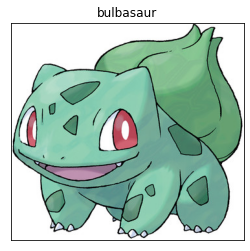

1 ivysaur


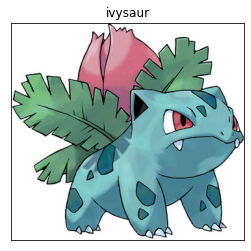

2 venusaur


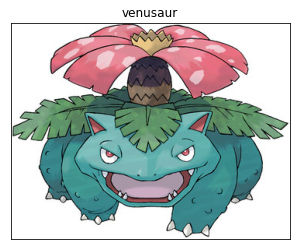

3 charmander


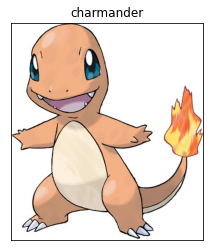

4 charmeleon


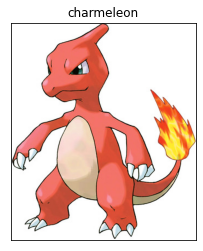

5 charizard


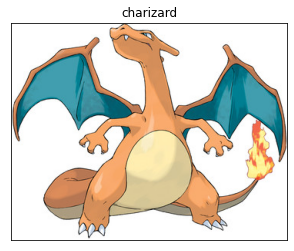

6 squirtle


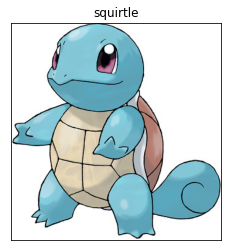

7 wartortle


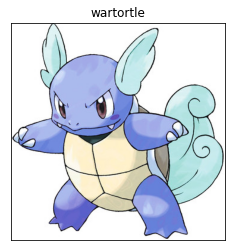

8 blastoise


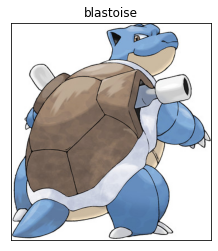

9 caterpie


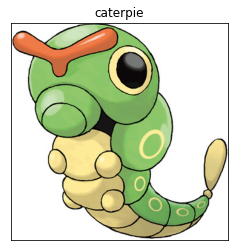

10 metapod


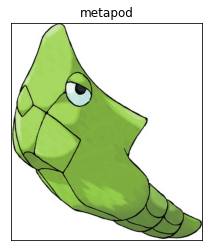

11 butterfree


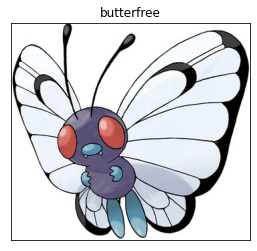

In [112]:
display_img_from_url(liste_pokemon, site = "https://img.pokemondb.net/artwork/")

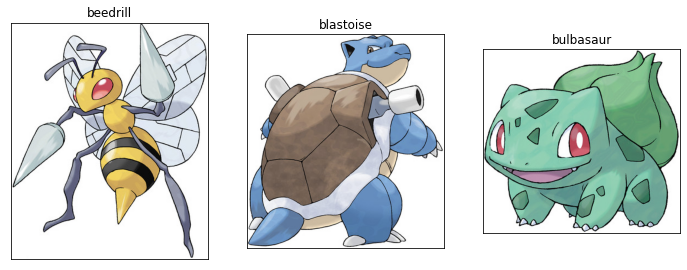

In [115]:
display_img_from_dir(img_path)